In [1]:
# Specify your working directory goes here
working_dir <- "/Users/rens/Github/Y2BA-Retake--Rens---Stijn-/EDA"
setwd(working_dir) # Setting working directory


In [3]:
## --Load Libraries-------------------------------------------------------------##
require("dplyr")
require("readr")
require("data.table")
require("ggplot2")


In [4]:
# Load the data from the specified CSV file
file_path <- file.path(working_dir, "../Data/filtered_data_text_new.csv")
data <- read_csv(file_path)

# Display the first few rows of the data
head(data)

New names:
* `Q139...385` -> `Q139`
* `Q140...386` -> `Q140`
* `Q141...387` -> `Q141`
* `Q142...388` -> `Q142`
Rows: 51 Columns: 92
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (86): Status, ResponseId, DistributionChannel, UserLanguage, Q2.2, demo...
dbl   (2): Progress, Duration..in.seconds.
lgl   (1): Finished
dttm  (3): StartDate, EndDate, RecordedDate

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


StartDate,EndDate,Status,Progress,Duration..in.seconds.,Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,...,Q230,Q10.2,Q10.3,Q10.4,Q10.5,Q10.6,Q10.7,X10.8,Q10.9,msc_ai_t
<dttm>,<dttm>,<chr>,<dbl>,<dbl>,<lgl>,<dttm>,<chr>,<chr>,<chr>,...,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2023-10-06 03:04:45,2023-10-06 03:15:43,IP Address,100,657,TRUE,2023-10-06 03:15:44,R_qDwf5mMAay8B97j,qr,EN,...,NA,Yes,Slightly familiar,Very useful,Weekly Once,Neither agree nor disagree,Somewhat better,Neither likely nor unlikely,Maybe,I don't have an opinion yet.
2023-10-06 03:35:01,2023-10-06 03:41:51,IP Address,100,409,TRUE,2023-10-06 03:41:52,R_D8gPNhwLPduCb8l,anonymous,EN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I don't have an opinion yet.
2023-10-09 05:42:47,2023-10-09 06:12:33,IP Address,100,1786,TRUE,2023-10-09 06:12:34,R_1goI7Nqb9uP3blM,qr,EN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I would seriously consider enrollment.
2023-10-09 11:22:47,2023-10-09 11:37:48,IP Address,100,900,TRUE,2023-10-09 11:37:49,R_21ujp43vxyA6lCU,qr,EN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I would most likely not consider enrollment.
2023-10-11 02:10:17,2023-10-11 02:14:28,IP Address,100,250,TRUE,2023-10-11 02:14:28,R_a4erbUWv1Lguqpr,qr,EN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I don't have an opinion yet.
2023-10-11 02:10:07,2023-10-11 02:15:13,IP Address,100,305,TRUE,2023-10-11 02:15:14,R_u484RG6A40P7EVr,qr,EN,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,I would seriously consider enrollment.


In [9]:
# AI knowledge data
ai_knowledge <- data.frame(
  Knowledge_about_AI = c("Extremely good", "Somewhat good", "Neither good nor Bad", "Somewhat bad", "Extremely bad"),
  Strongly_Agree = c(0, 1, 4, 3, 1),
  Somewhat_Agree = c(1, 0, 2, 1, 0),
  Neither_Agree_nor_Disagree = c(0, 3, 5, 2, 1),
  Somewhat_Disagree = c(1, 5, 7, 1, 0),
  Strongly_Disagree = c(0, 1, 2, 0, 0)
)

In [12]:
# Average grade data
data_grade_importance <- data.frame(
  Average_Grade = c("<6", "6-7", "7-8", "8-9", "9-10"),
  Very_Important = c(1, 5, 2, 0, 2),
  Moderately_Important = c(0, 5, 4, 1, 0),
  Extremely_Important = c(0, 3, 1, 0, 0)
)

In [14]:
# Chi square test for AI knowledge     
combined_table <- rbind(
  data_grade_importance$Very_Important,
  data_ai_knowledge$Strongly_Agree
)

# Voer de chi-kwadraattoets uit
chi_test <- chisq.test(combined_table)

# Resultaat
print(chi_test) 

Warning message in chisq.test(combined_table):
"Chi-squared approximation may be incorrect"



	Pearson's Chi-squared test

data:  combined_table
X-squared = 7.6352, df = 4, p-value = 0.1059



In [16]:
# Correlation analysis
ai_responses <- rowSums(data_ai_knowledge[2:6])  # Som van alle antwoorden per categorie
grade_responses <- rowSums(data_grade_importance[2:4])  # Som van alle antwoorden per categorie

# Correlatie berekenen
correlation <- cor(ai_responses, grade_responses)

# Resultaat
print(correlation)

[1] 0.5561517


Importance of components:
                          PC1    PC2
Standard deviation     1.2475 0.6662
Proportion of Variance 0.7781 0.2219
Cumulative Proportion  0.7781 1.0000

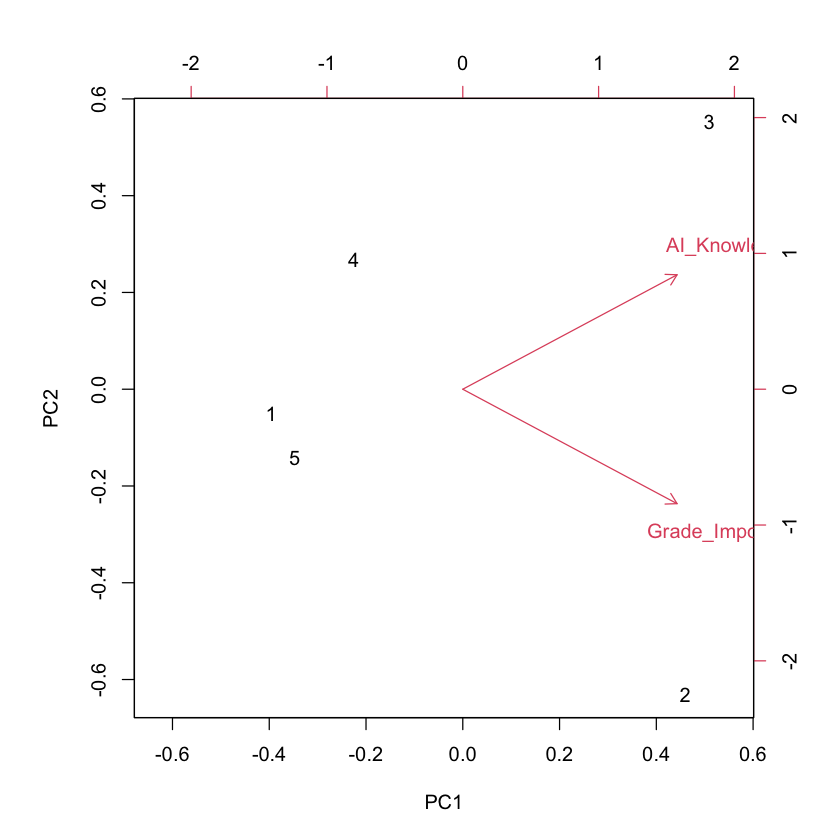

In [17]:
# PCA
# Combineer beide datasets
combined_data <- cbind(
  AI_Knowledge = rowSums(data_ai_knowledge[2:6]),
  Grade_Importance = rowSums(data_grade_importance[2:4])
)

# PCA uitvoeren
pca_result <- prcomp(combined_data, scale. = TRUE)

# PCA samenvatting bekijken
summary(pca_result)

# PCA plot
biplot(pca_result)

Importance of components:
                          PC1    PC2
Standard deviation     1.2475 0.6662
Proportion of Variance 0.7781 0.2219
Cumulative Proportion  0.7781 1.0000

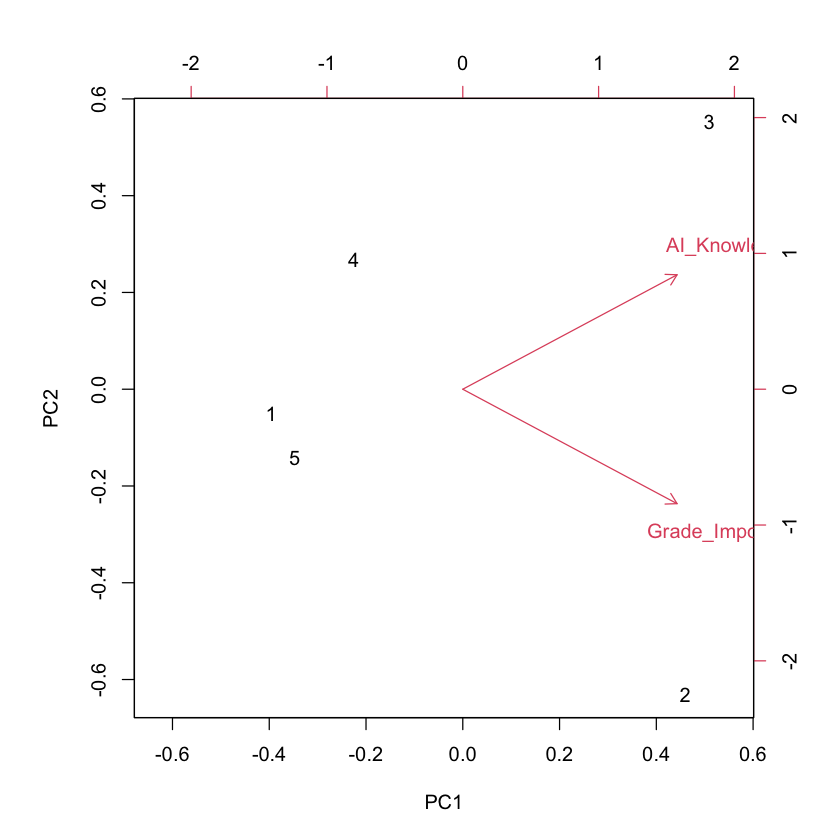

In [18]:
# ANOVA

# Combineer beide datasets
combined_data <- cbind(
  AI_Knowledge = rowSums(data_ai_knowledge[2:6]),
  Grade_Importance = rowSums(data_grade_importance[2:4])
)

# PCA uitvoeren
pca_result <- prcomp(combined_data, scale. = TRUE)

# PCA samenvatting bekijken
summary(pca_result)

# PCA plot
biplot(pca_result)